In [221]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy.stats import linregress
import seaborn as sns
from scipy.stats import ttest_ind



# Filtered Dataset
filtered_data = Path("Datasets/filtered_data.csv")
filtered_df = pd.read_csv(filtered_data)
filtered_df.head()

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
3,Transformers: The Last Knight,6.1,5548,"['Paramount', 'di Bonaventura Pictures', 'Ian ...",605425157,2017.0,5.2,164230.0,130170000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
4,Guardians of the Galaxy Vol. 2,7.6,19898,['Marvel Studios'],863756051,2017.0,7.6,736895.0,389810000.0,"['Action', ' Adventure', ' Comedy']",PG-13,['James Gunn']


In [222]:
# average_ratings_by_genre = filtered_df.groupby('Genre')['Movie Rating'].mean()
# average_ratings_by_genre.sort_values()


In [223]:
# average_ratings_by_genre.plot(kind="bar", figsize=(20,3.5), title = "Average Ratings by Genre")


# plt.show()
# plt.tight_layout()

In [224]:
# average_ratings_by_genre = pd.DataFrame(average_ratings_by_genre.plot(kind="scatter", 
# marker="o", title = "Average Ratings by Genre")

In [225]:
# build DataFrame with relevant info
genre = filtered_df["Genre"]
movie_rating = filtered_df["Movie Rating"]
movie_name = filtered_df["Movie Name"]
average_ratings_by_genre = pd.DataFrame({"Movie Name": movie_name, "Genre":genre, "Movie Rating":movie_rating}
                                       )
    
average_ratings_by_genre


,Movie Name,Genre,Movie Rating
0,Mother's Day,"['Comedy', ' Drama', ' Romance']",5.6
1,Spider-Man: Into the Spider-Verse,"['Animation', ' Action', ' Adventure']",8.4
2,Transformers: Age of Extinction,"['Action', ' Adventure', ' Sci-Fi']",5.6
3,Transformers: The Last Knight,"['Action', ' Adventure', ' Sci-Fi']",5.2
4,Guardians of the Galaxy Vol. 2,"['Action', ' Adventure', ' Comedy']",7.6
...,...,...,...
1379,The Butler,"['Biography', ' Drama']",7.2
1380,High-Rise,"['Drama', ' Sci-Fi']",5.5
1381,The Birth of a Nation,"['Biography', ' Drama', ' History']",6.5
1382,Little Boy,"['Drama', ' History', ' War']",7.3


In [226]:
# split genres in to single values
filtered_df['Genre'] = filtered_df['Genre'].apply(literal_eval)

split_data = filtered_df.explode('Genre')


split_data.head()

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Comedy,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Drama,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Romance,PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Animation,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Action,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."


In [227]:
split_data.head()

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Comedy,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Drama,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Romance,PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Animation,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Action,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."


In [228]:
# drop null values
split_data= split_data.dropna()


In [229]:
# find max rating
max_rating = max(split_data["Movie Rating"])
max_rating

8.8

In [230]:
# max rated name
highest_rated_movie = split_data.loc[split_data['Movie Rating'].idxmax()]['Movie Name']
highest_rated_movie



50    Inception
50    Inception
50    Inception
Name: Movie Name, dtype: object

In [231]:
# find min rating
min_rating = min(split_data["Movie Rating"])
min_rating

4.9

In [232]:
# min movie name
lowest_rated_movie = split_data.loc[split_data['Movie Rating'].idxmin()]['Movie Name']
lowest_rated_movie

159    The Twilight Saga: Breaking Dawn - Part 1
159    The Twilight Saga: Breaking Dawn - Part 1
159    The Twilight Saga: Breaking Dawn - Part 1
Name: Movie Name, dtype: object

In [233]:
# ratings value counts
movie_values = filtered_df['Movie Rating'].value_counts()
movie_values

Movie Rating
6.4    78
6.3    73
6.6    73
6.2    70
6.5    64
7.1    63
6.7    62
7.3    59
6.8    56
7.0    53
7.2    51
6.9    50
6.1    48
5.6    47
5.7    41
7.5    41
7.4    40
5.8    39
5.9    39
6.0    37
7.8    35
7.6    34
7.7    30
5.4    25
5.5    25
8.1    21
7.9    21
5.3    20
5.2    19
8.0    17
5.1    12
4.9    10
8.4     8
5.0     8
8.2     5
8.3     4
8.5     4
8.7     1
8.8     1
Name: count, dtype: int64

In [251]:
total_votes_per_genre = split_data.groupby('Genre')['Vote Count'].sum()
total_votes_per_genre

Genre
Action       2655091
Adventure    2311253
Animation     548907
Biography     442699
Comedy       1627939
Crime         763401
Drama        2292478
Family        231048
Fantasy       654305
History       139348
Horror        518557
Music         116313
Musical        23433
Mystery       544997
Romance       483836
Sci-Fi       1124110
Sport          34701
Thriller      971881
War            61314
Western        42518
Name: Vote Count, dtype: int64

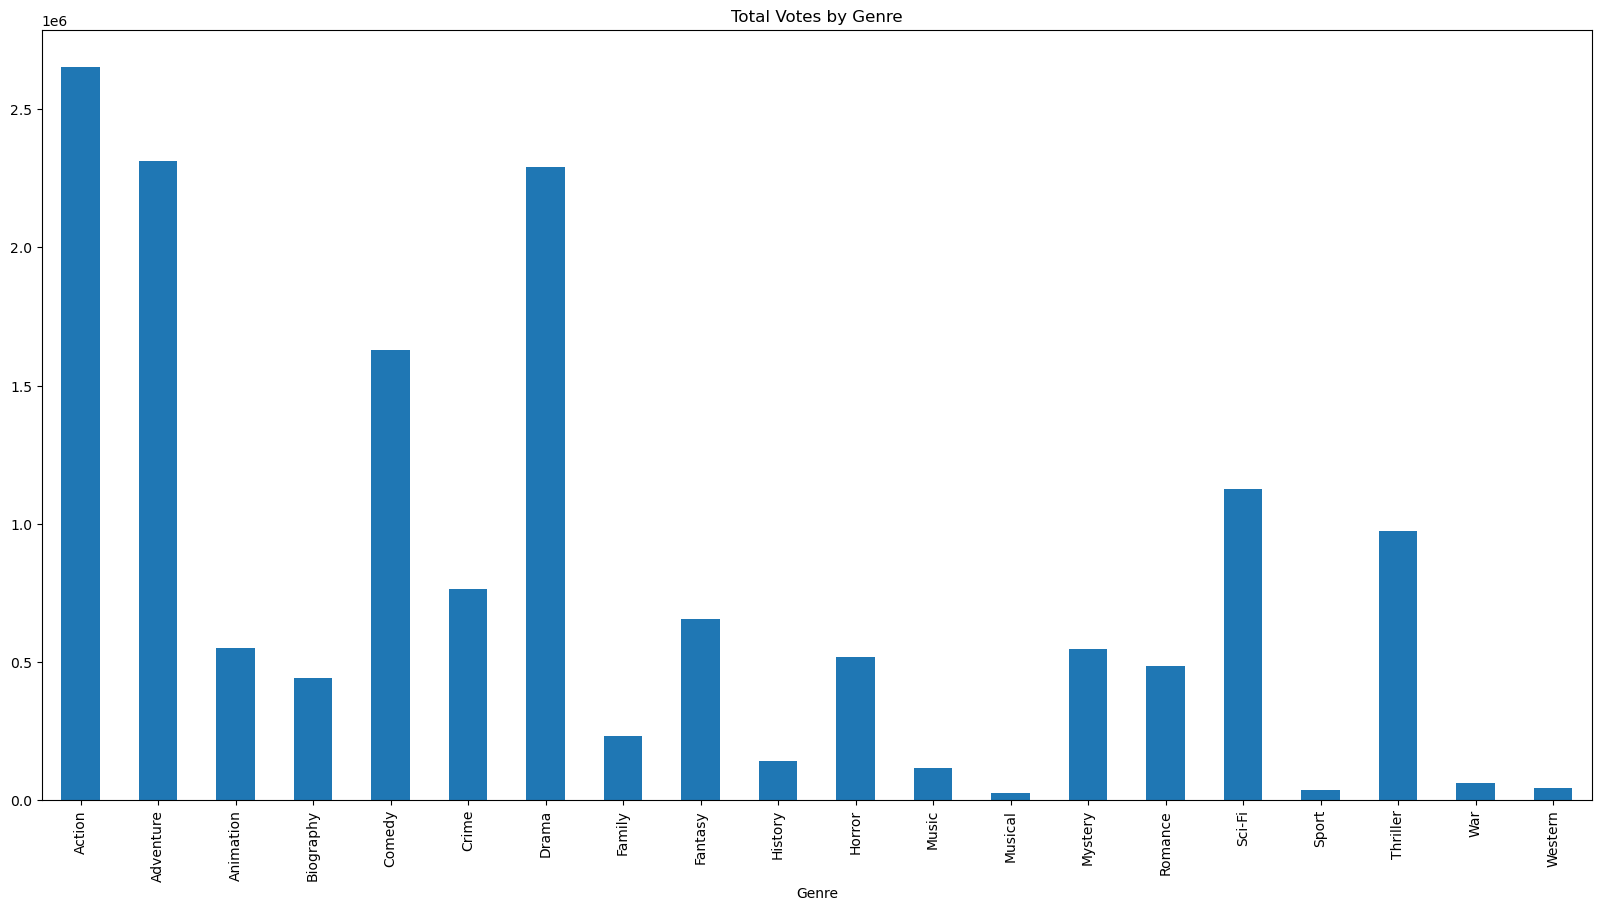

<Figure size 640x480 with 0 Axes>

In [253]:
total_votes_per_genre.plot(kind="bar", figsize=(20,10
                                               ), title = "Total Votes by Genre")


plt.show()
plt.tight_layout()

In [234]:
# describe dataset 
filtered_df["Movie Rating"].describe()

count    1384.000000
mean        6.629046
std         0.775638
min         4.900000
25%         6.100000
50%         6.600000
75%         7.200000
max         8.800000
Name: Movie Rating, dtype: float64

<Axes: >

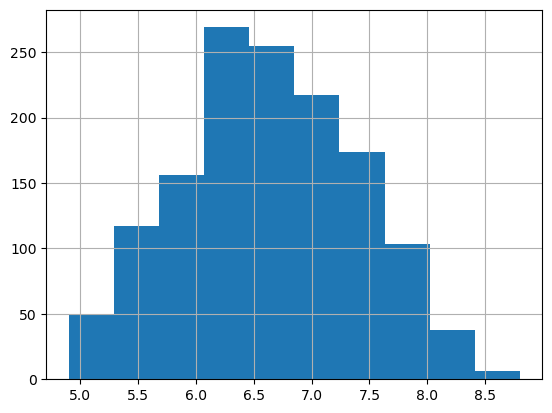

In [235]:
filtered_df["Movie Rating"].hist(bins=10)

<Axes: >

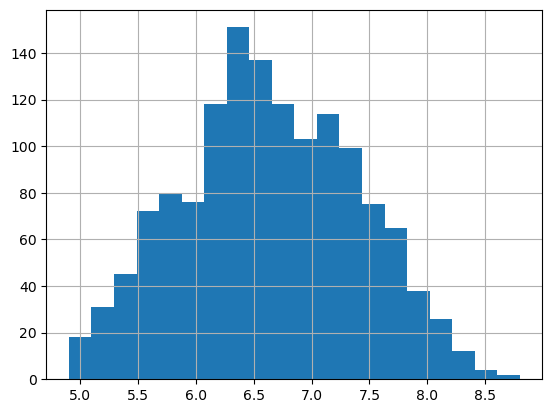

In [236]:
filtered_df["Movie Rating"].hist(bins=20)

In [237]:
# len(avg_ratings_by_genre)

In [238]:
# avg_ratings_by_genre_df = pd.DataFrame({" Action":"Action", " Adventure":"Adventure", "Animation": "Animation", 
#                                      " Biography":"Biography",
#                                     " Comedy":"Comedy", " Crime":"Crime", " Drama": "Drama", " Family":"Family",
#                                     " Fantasy":"Fantasy", " History":"History", " Music": "Music",
#                                     " Musical": "Musical", " Mystery":"Mystery", " Romance":"Romance", " Sci-Fi":"Sci-Fi",
#                                     " Sport":"Sport", " Thriller": "Thriller", " War": "War", " Western":"Western"},
#                                        index=[0])
# avg_ratings_by_genre_df.head()

In [239]:
# " Action"== "Action",
# " Adventure"=="Adventure",
# "Animation"== "Animation", 
# " Biography"=="Biography",
# " Comedy"=="Comedy", 
# " Crime"=="Crime",
# " Drama"== "Drama",
# " Family"=="Family",
# " Fantasy"=="Fantasy", 
# " History"=="History", 
# " Music"== "Music",
# " Musical"== "Musical",
# " Mystery"=="Mystery", 
# " Romance"=="Romance", 
# " Sci-Fi"=="Sci-Fi",
# " Sport"=="Sport", 
# " Thriller"== "Thriller", 
# " War"== "War", 
# " Western"=="Western"
                                       

In [240]:
# combine data and get rid of random spacing in duplicate columns
split_data['Genre'] = split_data['Genre'].replace({" Action": "Action"})
split_data['Genre'] = split_data['Genre'].replace({" Adventure": "Adventure"})
split_data['Genre'] = split_data['Genre'].replace({" Biography": "Biography"})
split_data['Genre'] = split_data['Genre'].replace({" Comedy": "Comedy"})
split_data['Genre'] = split_data['Genre'].replace({" Crime": "Crime"})
split_data['Genre'] = split_data['Genre'].replace({" Drama": "Drama"})
split_data['Genre'] = split_data['Genre'].replace({" Family": "Family"})
split_data['Genre'] = split_data['Genre'].replace({" Fantasy": "Fantasy"})
split_data['Genre'] = split_data['Genre'].replace({" History": "History"})
split_data['Genre'] = split_data['Genre'].replace({" Horror": "Horror"})
split_data['Genre'] = split_data['Genre'].replace({" Music": "Music"})
split_data['Genre'] = split_data['Genre'].replace({" Musical": "Musical"})
split_data['Genre'] = split_data['Genre'].replace({" Mystery": "Mystery"})
split_data['Genre'] = split_data['Genre'].replace({" Romance": "Romance"})
split_data['Genre'] = split_data['Genre'].replace({" Sci-Fi": "Sci-Fi"})
split_data['Genre'] = split_data['Genre'].replace({" Sport": "Sport"})
split_data['Genre'] = split_data['Genre'].replace({" Thriller": "Thriller"})
split_data['Genre'] = split_data['Genre'].replace({" War": "War"})
split_data['Genre'] = split_data['Genre'].replace({" Western": "Western"})


In [241]:
# avg ratings by genre
avg_ratings_by_genre = split_data.groupby('Genre')['Movie Rating'].mean()
avg_ratings_by_genre


Genre
Action       6.552410
Adventure    6.621867
Animation    6.867769
Biography    7.103008
Comedy       6.501728
Crime        6.649561
Drama        6.857163
Family       6.559016
Fantasy      6.290152
History      6.937500
Horror       6.167273
Music        6.709677
Musical      6.857143
Mystery      6.503472
Romance      6.577222
Sci-Fi       6.652308
Sport        6.966667
Thriller     6.497992
War          7.113636
Western      6.877778
Name: Movie Rating, dtype: float64

In [242]:
len(avg_ratings_by_genre)

20

In [243]:
# Sort the DataFrame by average rating in descending order
high_avg_ratings_by_genre = avg_ratings_by_genre.sort_values(ascending=False)

# Get the top 5 genres with highest average rating
top_5_genres = high_avg_ratings_by_genre.head()



# Print the top 5 genres
print(top_5_genres)

Genre
War          7.113636
Biography    7.103008
Sport        6.966667
History      6.937500
Western      6.877778
Name: Movie Rating, dtype: float64


In [244]:
low_avg_ratings_by_genre = avg_ratings_by_genre.sort_values(ascending=True)

bottom_5_genres = low_avg_ratings_by_genre.head()

print(bottom_5_genres)

Genre
Horror      6.167273
Fantasy     6.290152
Thriller    6.497992
Comedy      6.501728
Mystery     6.503472
Name: Movie Rating, dtype: float64


In [245]:
correlation_matrix = split_data.corr()
rating_correlation = correlation_matrix['Movie Rating'].sort_values(ascending=False)
print(rating_correlation)

ValueError: could not convert string to float: "Mother's Day"

In [ ]:
# Example of a scatter plot
sns.scatterplot(x='Vote Count', y='Movie Rating', data=split_data)
plt.show()

In [ ]:
votes = split_data["Vote Count"]
movie_rating = split_data["Movie Rating"]

x_values = votes
y_values = movie_rating

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0.8),fontsize=15,color="red")
plt.xlabel("Vote Count")
plt.ylabel('Movie Rating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
plt.scatter(split_data["Vote Count"], split_data["Movie Rating"], marker="o", facecolors="g", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Vote Count")
plt.ylabel("Movie Rating)")
plt.title("Vote Count vs Movie Rating")
plt.grid(True) 
plt.tight_layout()
plt.show()

In [ ]:

# # Create an empty DataFrame to store the results
# result_df = pd.DataFrame()

# # Iterate over the top 6 genres
# for genre in top_6_genres:
#     # Filter DataFrame for the current genre
#     genre_df = split_data[split_data['Genre'] == genre]
    
#     # Group by 'Year' and count the number of ratings
#     genre_counts = genre_df.groupby('Year of Release')['Movie Rating'].count().reset_index()
    
#     # Rename the count column to the genre name
#     genre_counts.rename(columns={'Rating': genre}, inplace=True)
    
#     # Merge the counts into the result DataFrame
#     result_df = pd.merge(result_df, genre_counts, on='Year of Release', how='outer')

# # Fill NaN values with 0
# result_df.fillna(0, inplace=True)

# # Display the result
# print(result_df)

In [ ]:
# genre = filtered_df["Genre"]
# avg_ratings_by_genre = avg_ratings_by_genre

# For each top 6 genre, find the number of movie ratings per year
for genre in top_6_genres:
    # Filter the DataFrame for the specific genre
    genre_ratings = split_data[split_data['Genre'] == genre]

    # Group the genre ratings by year and count the number of ratings for each year
    ratings_per_year = genre_ratings.groupby('Year of Release')['Movie Name'].count()

    # Print the results for the current genre
    print(f"Genre: {genre}")
    print(ratings_per_year)

In [ ]:
# # Get the top 6 genres by count
# top_genres = split_data['Genre'].value_counts().index[:6]

# # Initialize dictionary to store counts 
# genre_counts = {genre: {year: 0 for year in range(min(split_data['Year of Release']),
#                                                   max(split_data['Year of Release'])+1)} for genre in top_genres}

# # Iterate through the data
# for i, row in split_data.iterrows():
#     if row['Genre'] in top_genres:
#         genre_counts[row['Genre']][row['Year of Release']] += 1
        
# # Print results
# for genre, counts in genre_counts.items():
#     print(genre)
#     print(counts)
#     print()

In [ ]:
genre = filtered_df["Genre"]
avg_ratings_by_genre = avg_ratings_by_genre

In [263]:

split_data = pd.DataFrame(split_data)

# Group by 'Genre' and calculate total votes and average rating
genre_stats = split_data.groupby('Genre').agg({'Vote Count': 'sum', 'Movie Rating': 'mean'}).rename(columns={'Vote Count': 'Total Votes', 'Movie Rating': 'Average Rating'})
genre_stats.sort_values(ascending=True)
# Display the result
print(genre_stats)


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

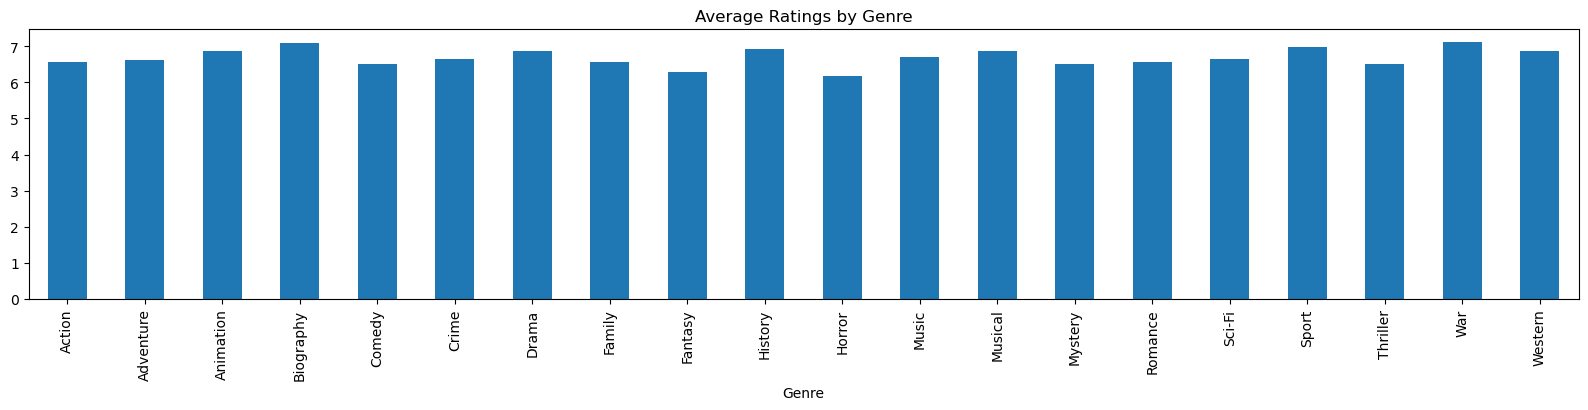

<Figure size 640x480 with 0 Axes>

In [246]:
# Barchart of avg ratings by genre
avg_ratings_by_genre.plot(kind="bar", figsize=(20,3.5), title = "Average Ratings by Genre")


plt.show()
plt.tight_layout()

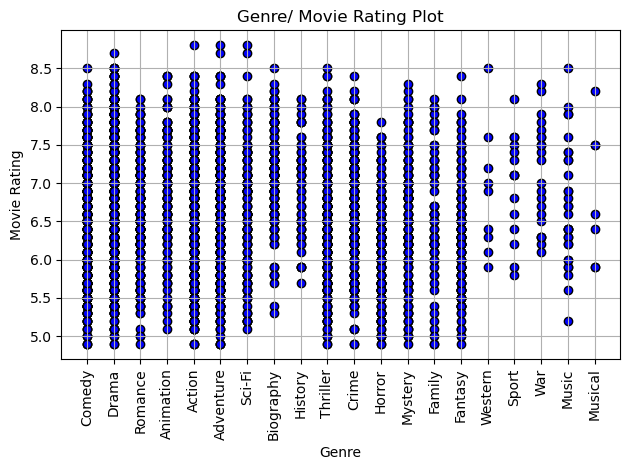

In [247]:
# scatterplot of avg ratings by genre
plt.scatter(split_data["Genre"], split_data["Movie Rating"], marker="o",
            facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Genre")
plt.ylabel("Movie Rating")
plt.title("Genre/ Movie Rating Plot")
plt.xticks(rotation=90)
plt.grid(True) 
plt.tight_layout()


In [249]:
war_ratings = split_data[split_data['Genre'] == 'War']['Movie Rating']
horror_ratings = split_data[split_data['Genre'] == 'Horror']['Movie Rating']

t_stat, p_value = ttest_ind(war_ratings, horror_ratings)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 6.138704620681161, P-value: 4.954487594422939e-09
